<a href="https://colab.research.google.com/github/afifibd/Machine-Learning/blob/main/Week-11/LeNet_Lecture_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Afif Ibadurrahman J

NIM: 1103210221

Lecture : 11

Model: LeNet

LeNet adalah arsitektur jaringan saraf tiruan (neural network) yang diperkenalkan oleh Yann LeCun dan rekan-rekannya pada akhir 1980-an dan awal 1990-an. Arsitektur ini merupakan salah satu jaringan konvolusional (Convolutional Neural Network atau CNN) pertama yang berhasil digunakan dalam aplikasi nyata, khususnya dalam pengenalan tulisan tangan.

LeNet awalnya dikembangkan untuk mengenali digit tulisan tangan dalam gambar yang merupakan bagian dari dataset MNIST. Beberapa karakteristik utama dari LeNet meliputi:

1. **Lapisan Konvolusi (Convolutional Layers)**: Lapisan ini bertugas untuk mengekstrak fitur dari input gambar dengan mengaplikasikan filter (kernel) pada gambar tersebut.
2. **Lapisan Pooling/Subsampling**: Lapisan ini berfungsi untuk mengurangi dimensi spasial dari fitur yang dihasilkan oleh lapisan konvolusi, biasanya dengan menggunakan operasi max pooling atau average pooling.
3. **Lapisan Fully Connected**: Setelah beberapa lapisan konvolusi dan pooling, lapisan ini menghubungkan semua neuron dari lapisan sebelumnya ke semua neuron di lapisan berikutnya, seperti pada jaringan saraf tiruan klasik (feedforward neural network).
4. **Lapisan Output**: Lapisan ini menghasilkan output akhir dari jaringan, misalnya probabilitas dari setiap kelas pada masalah klasifikasi.

Arsitektur LeNet telah menjadi dasar bagi banyak perkembangan selanjutnya dalam jaringan saraf konvolusional dan terus digunakan sebagai referensi dalam penelitian dan pengajaran tentang deep learning.

# Memuat Library

In [1]:
# Import Library yang diperlukan
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

# Memuat Dataset

In [2]:
# Memuat Dataset dan melakukan Pemisahan Dataset (Train & Testing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Pra-Prosesan

In [3]:
# Menjalankan Operasi Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalisasi
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Arsitektur LeNet

In [4]:
# Membangun Arsitektur Model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Melatih Model

In [6]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, batch_size=360, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
167/167 [==============================] - 26s 142ms/step - loss: 0.5763 - accuracy: 0.8289 - val_loss: 0.1914 - val_accuracy: 0.9406
Epoch 2/20
167/167 [==============================] - 20s 119ms/step - loss: 0.1590 - accuracy: 0.9516 - val_loss: 0.1072 - val_accuracy: 0.9692
Epoch 3/20
167/167 [==============================] - 22s 135ms/step - loss: 0.1062 - accuracy: 0.9670 - val_loss: 0.0902 - val_accuracy: 0.9728
Epoch 4/20
167/167 [==============================] - 22s 130ms/step - loss: 0.0815 - accuracy: 0.9746 - val_loss: 0.0616 - val_accuracy: 0.9816
Epoch 5/20
167/167 [==============================] - 23s 139ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0514 - val_accuracy: 0.9838
Epoch 6/20
167/167 [==============================] - 25s 150ms/step - loss: 0.0575 - accuracy: 0.9823 - val_loss: 0.0495 - val_accuracy: 0.9844
Epoch 7/20
167/167 [==============================] - 20s 117ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0471 - val_ac

# Evaluasi Model

In [8]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0413 - accuracy: 0.9877
Test Loss: 0.041303861886262894
Test accuracy: 0.9876999855041504


In [9]:
# Total data training
total_train_data = len(x_train)
# Total data testing
total_test_data = len(x_test)

print("Total data training set:", total_train_data)
print("Total data testing set:", total_test_data)

Total data training set: 60000
Total data testing set: 10000


In [11]:
# Predictions on training data
train_predictions = model.predict(x_train)
train_correct = sum([1 for i in range(len(train_predictions)) if np.argmax(train_predictions[i]) == np.argmax(y_train[i])])

# Predictions on testing data
test_predictions = model.predict(x_test)
test_correct = sum([1 for i in range(len(test_predictions)) if np.argmax(test_predictions[i]) == np.argmax(y_test[i])])

print("Total correct predictions training data:", train_correct)
print("Total correct predictions testing data:", test_correct)

313/313 [==============================] - 2s 5ms/step
Total correct predictions training data: 59725
Total correct predictions testing data: 9877


# Visualisasi Model

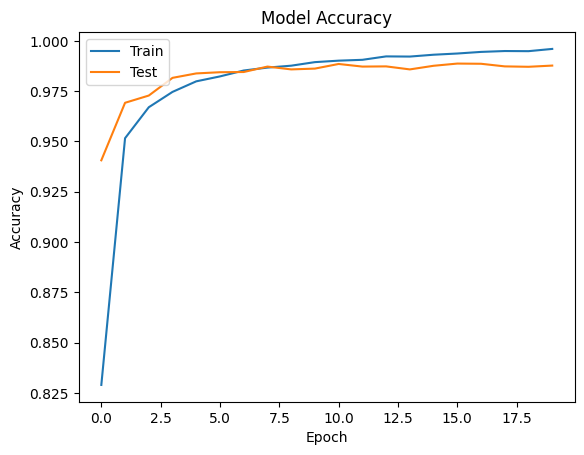

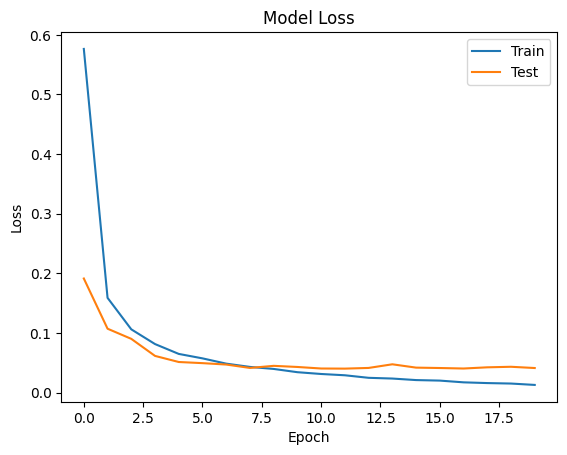

In [10]:
# Plotting model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()